# Procesamiento del Lenguaje Natural y Aprendizaje Supervisado

### Importar librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Leer los datos

In [2]:
datos = pd.read_csv('airline_tweets.csv')

In [3]:
datos.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

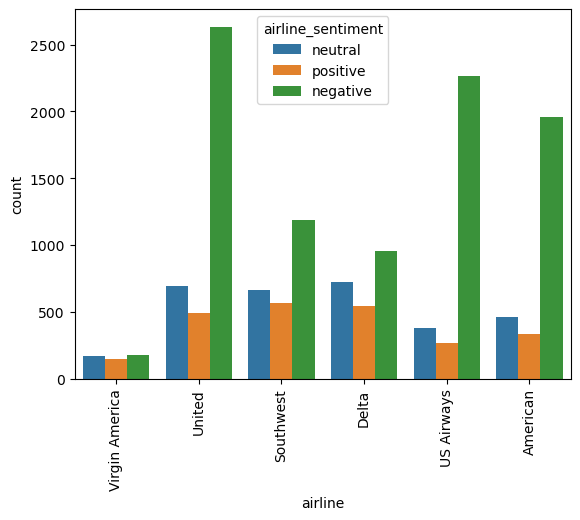

In [5]:
sns.countplot(data=datos,x='airline',hue='airline_sentiment')
plt.xticks(rotation=90);

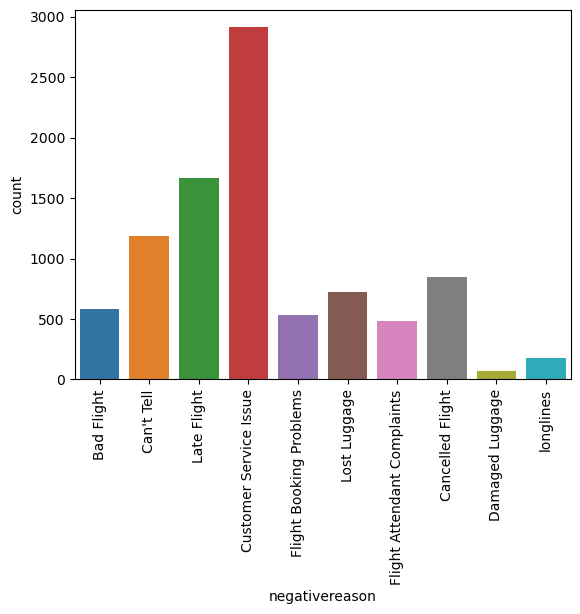

In [6]:
sns.countplot(data=datos,x='negativereason')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

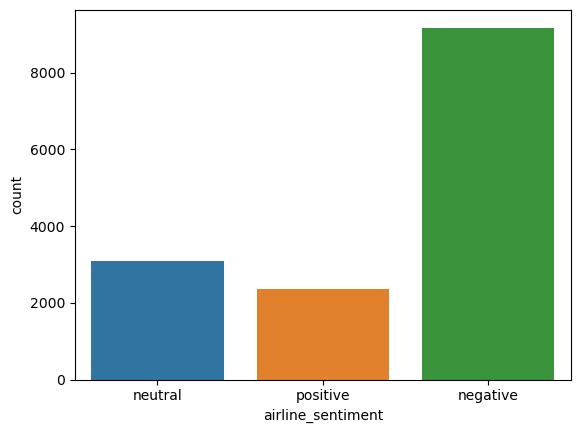

In [7]:
sns.countplot(data=datos,x='airline_sentiment')

In [8]:
datos['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Características y etiquetas

In [9]:
documentos = datos[['airline_sentiment','text']]

In [10]:
documentos.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [11]:
y = datos['airline_sentiment']
X = datos['text']

### División en conjunto de entrenamiento y prueba

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.20,
                                                   random_state=101)

### Vectorización

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf = TfidfVectorizer(stop_words='english')

In [16]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [17]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [18]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

In [19]:
X_test_tfidf

<2928x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 24951 stored elements in Compressed Sparse Row format>

### Comparación de Modelos: Naive Bayes, Regresión Logística, LinearSVC

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [21]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [22]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

### Evaluación

In [23]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [24]:
def reporte(modelo):
    preds = modelo.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(modelo,X_test_tfidf,y_test)

Modelo Naive Bayes
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



C:\Users\Juan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


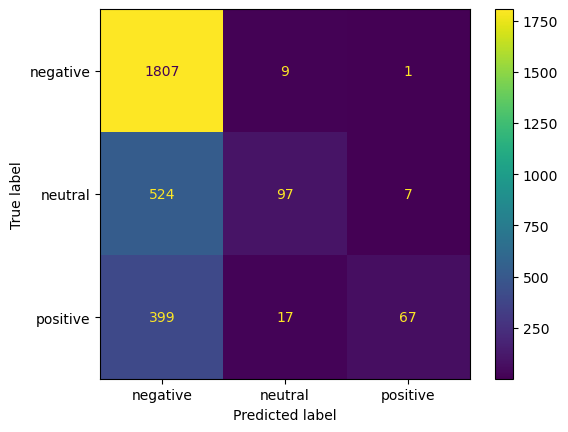

In [25]:
print("Modelo Naive Bayes")
reporte(nb)

Regresión Logística
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



C:\Users\Juan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


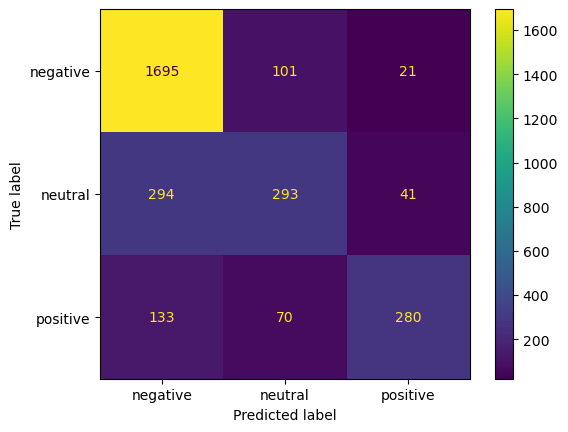

In [26]:
print("Regresión Logística")
reporte(log)

Clasificador con Vectores de Soporte
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



C:\Users\Juan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


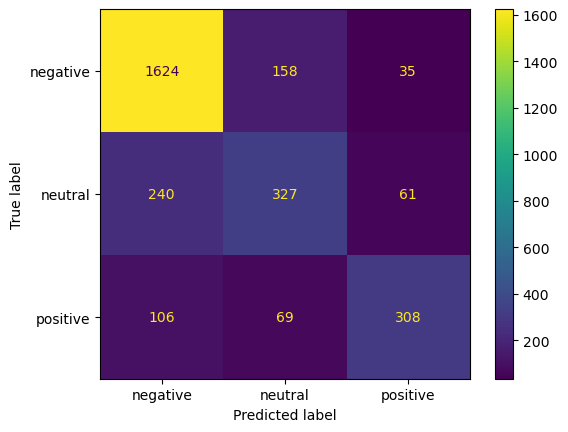

In [27]:
print('Clasificador con Vectores de Soporte')
reporte(svc)

### Pipeline para nuevos tweets

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
canal = Pipeline([('tfidf',TfidfVectorizer()),
                 ('svc',LinearSVC())])

In [30]:
canal.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [31]:
nuevo_tweet = ['good flight']
canal.predict(nuevo_tweet)

array(['positive'], dtype=object)

In [32]:
nuevo_tweet = ['bad flight']
canal.predict(nuevo_tweet)

array(['negative'], dtype=object)

In [33]:
nuevo_tweet = ['ok flight']
canal.predict(nuevo_tweet)

array(['neutral'], dtype=object)

In [34]:
nuevo_tweet = ['dangerous flight']
canal.predict(nuevo_tweet)

array(['negative'], dtype=object)